In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from PIL import Image

2025-10-20 05:50:00.506050: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-20 05:50:00.559515: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-10-20 05:50:00.559571: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-10-20 05:50:00.562526: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-10-20 05:50:00.575930: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-20 05:50:00.577120: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [3]:
data_dir = "../data"
damage_dir = os.path.join(data_dir, "damage")
no_damage_dir = os.path.join(data_dir, "no_damage")

print(f"Damage images: {len(os.listdir(damage_dir))}")
print(f"No-damage images: {len(os.listdir(no_damage_dir))}")

Damage images: 14170
No-damage images: 7152


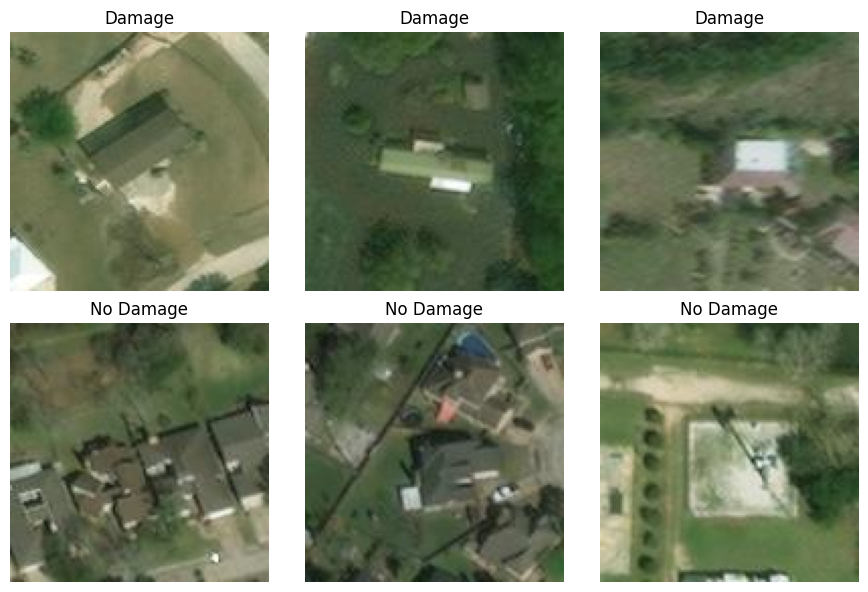

In [4]:
import random
sample_damage = random.sample(os.listdir(damage_dir), 3)
sample_no_damage = random.sample(os.listdir(no_damage_dir), 3)

fig, axes = plt.subplots(2, 3, figsize=(9, 6))
for i, img_name in enumerate(sample_damage):
    img = Image.open(os.path.join(damage_dir, img_name))
    axes[0, i].imshow(img)
    axes[0, i].set_title("Damage")
    axes[0, i].axis("off")

for i, img_name in enumerate(sample_no_damage):
    img = Image.open(os.path.join(no_damage_dir, img_name))
    axes[1, i].imshow(img)
    axes[1, i].set_title("No Damage")
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()

In [5]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="training"
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="validation"
)

Found 17058 images belonging to 2 classes.
Found 4264 images belonging to 2 classes.


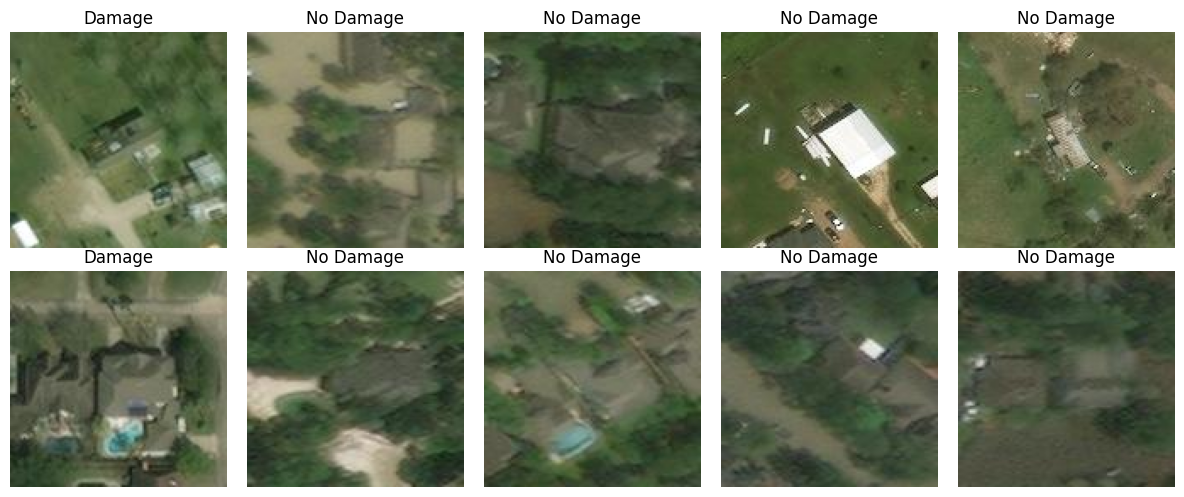

In [6]:
imgs, labels = next(train_gen)
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(imgs[i])
    ax.set_title("Damage" if labels[i] == 1 else "No Damage")
    ax.axis("off")
plt.tight_layout()
plt.show()